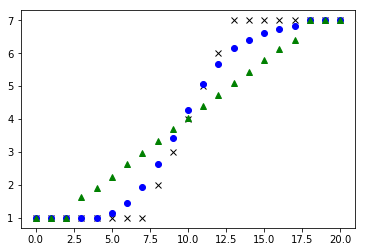

In [55]:
# Smoothing Test
import numpy as np
import matplotlib.pyplot as plt


y = np.ones(7)
y = np.append(y, np.arange(1,8))
y = np.append(y, np.ones(7)*7)

def rect(x):
    
    x = np.copy(x)
    s = 3
    for i in range(len(x)):
        if i < s:
            continue
        if i > (len(x)-1-s):
            continue
        avg = x[i]
        for j in range(1,s+1):
            avg += x[i+j]
            avg += x[i-j]
            
        x[i] = avg/(s*2+1)
        
    return x

plt.plot(y,'kx')
y_new = rect(y)
plt.plot(y_new, 'bo')

for i in range(20):
    y_new = rect(y_new)

plt.plot(y_new, 'g^')
plt.show()